# Introduction to Neural Network Classification with TensorFlow
We'll be writing neural networks for classification problems.

A classification algorithm is a type of supervised learning algorithm that is used to categorize input data into predefined classed or labels.

**A few types of classification problems:**
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=24
                  )

In [5]:
# Checkout the features
X

array([[-0.04118732,  1.02240395],
       [-0.33642724, -0.97070361],
       [ 0.76363354, -0.17575351],
       ...,
       [-0.75633553,  0.64476773],
       [ 0.22326899, -0.77723908],
       [ 0.50153825, -0.84999407]])

In [7]:
# Checkout the labels
y[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [8]:
# lets check the shape
X.shape, y.shape

((1000, 2), (1000,))

### Lets convert out data into pandas dataframe for better understanding and visualization

In [9]:
import pandas as pd
circles = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'label': y})
circles

,x1,x2,label
0,-0.041187,1.022404,0
1,-0.336427,-0.970704,0
2,0.763634,-0.175754,1
3,0.963277,-0.322136,0
4,0.998112,-0.110814,0
...,...,...,...
995,0.292466,-0.960276,0
996,-0.380756,-0.918020,0
997,-0.756336,0.644768,0
998,0.223269,-0.777239,1


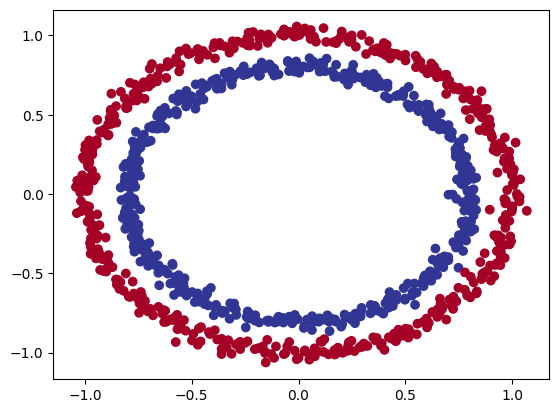

In [12]:
# Visualize with the a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Steps in Modelling
The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

### Building the model

In [13]:
# Import tensorflow
import tensorflow as tf

In [15]:
# Set the random seed
tf.random.set_seed(24)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the data
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4557 - loss: 4.7058
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4564 - loss: 4.6726
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4587 - loss: 4.6547
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4603 - loss: 4.5999
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4570 - loss: 4.5859
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4570 - loss: 4.5822
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4570 - loss: 4.5789
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4586 - loss: 4.5757
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4599 - loss: 4.5725
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4603 - loss: 4.5694


In [16]:
# Let's try and impove our model by training for longer epochs
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4827 - loss: 0.6938


[0.6935067772865295, 0.5009999871253967]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... its not performing well.

So let's try to make it better model by adding extra layer.

In [19]:
# Set random seed
tf.random.set_seed(24)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the data into model
model_2.fit(X, y, epochs=200, verbose=0)

In [20]:
# Evaluate the model_2
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4828 - loss: 0.6935


[0.6931748986244202, 0.49799999594688416]

>**Even though adding layers model_2 didn't improve. Its still making predictions with 50% accuracy.**

---
## Common ways to improve a deep model:
1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer ( increase the epochs)

>Because you can alter each of these, they're **hyperparameters**.

In [22]:
# Build the model with extra layers and more units
# Set random seed
tf.random.set_seed(24)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. fit the data into model
model_3.fit(X, y, epochs=200, verbose=0)

In [23]:
# Evaluate model if improved
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4807 - loss: 0.6947


[0.6935448050498962, 0.49799999594688416]

Whaatt... Model is not improving 🤔.

* Let's check the data that why our model is not learning the data.
* Lets do some visualization.
To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
- Take in a trained model, features (X) and labels (y)
- Create a meshgrid of the different X values
- Make predictions across the [meshgrid](https://numpy.org/doc/2.2/reference/generated/numpy.meshgrid.html)
- Plot the predictions as well as a line between zones (where each unique class falls)

In [27]:
# Import the library
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predcting on X.
    This function is inspired from github repos:
    1. cs231n
    2. madewithml
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s =40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


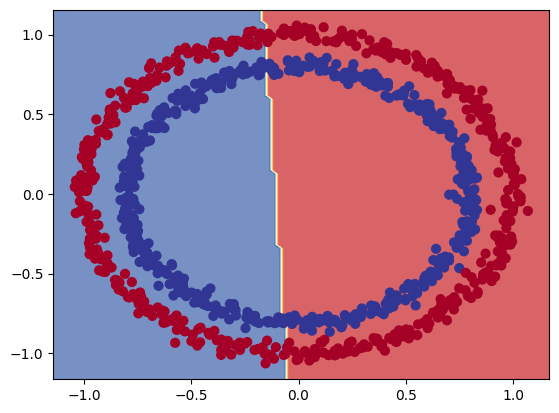

In [28]:
# Check the predictions of model_3
plot_decision_boundary(model_3, X, y)

> **Insights**: Our model is making incorrect predictions 50% of the time because we are trying to fit a linear model to non-linear data.

In [31]:
# Let's see if our model can be used for a regression problem 
from sklearn.model_selection import train_test_split
tf.random.set_seed(24)

# Create some regression data
X_reg = tf.range(0, 500, 2)
y_reg = tf.range(20, 520, 2)  # y = x + 20


# Split our regression data into training and test set
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg.numpy(), y_reg.numpy(), test_size=.20, random_state=24)

In [33]:
# check the shape of regression data
X_reg_train[0].shape

()

In [42]:
# Create regression model for regression problem 
# we can't since above model created for classifcation task

# Setup random seed
tf.random.set_seed(24)

# 1. create the model
model_reg = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
    ])

# 2. compile the model
model_reg.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the data into regression model
model_reg.fit(X_reg_train, y_reg_train, epochs=200, verbose=0)

# 4. Evaluate the model
model_reg.evaluate(X_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.8614 - mae: 7.8614 


[7.818366050720215, 7.818366050720215]

In [44]:
# Make predictions with our trained regression model
y_reg_preds = model_reg.predict(X_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


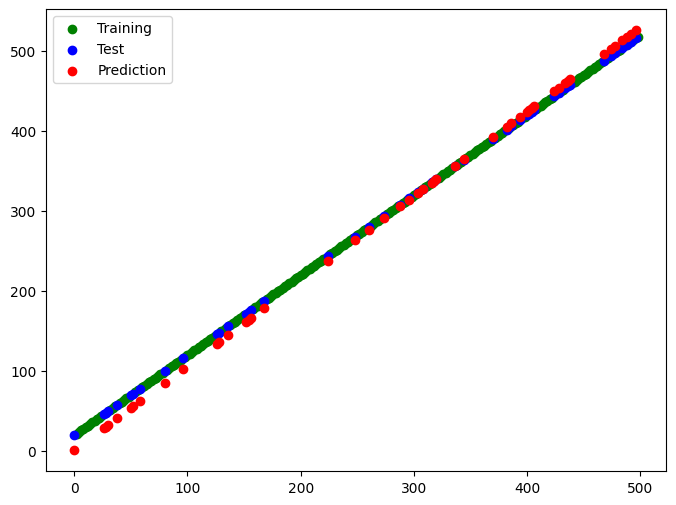

In [45]:
# Plot the regression model's predictions against actual data
plt.figure(figsize=(8, 6))
plt.scatter(X_reg_train, y_reg_train, c='g', label="Training")
plt.scatter(X_reg_test, y_reg_test, c='b', label='Test')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Prediction')
plt.legend();
            

**Notice:** Here, in the case of regression, the data is linear, which is why it performs better than the classification model, where the data is non-linear.  

---

## **Missing Piece: Non-Linearity**


In [89]:
# lets rebuild model with an activation funciton

# Set the random seed
tf.random.set_seed(24)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(11, activation='linear'), # another way `tf.keras.activations.linear`
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_4.compile(
    loss='binary_crossentropy', # another way `tf.keras.losses.BinaryCrossentropy`
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # another way `adam`
    metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

In [90]:
# Evaluate the model
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4886 - loss: 0.6939


[0.6934507489204407, 0.5070000290870667]

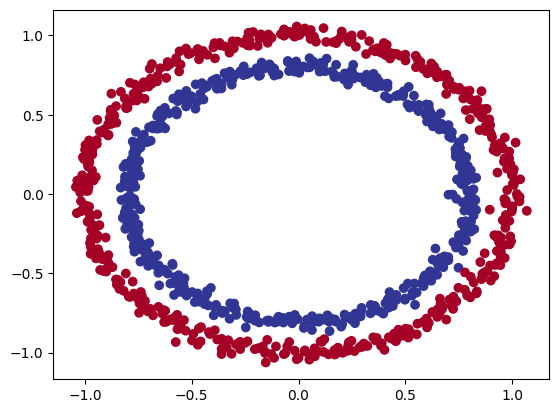

In [97]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Doing binary classification


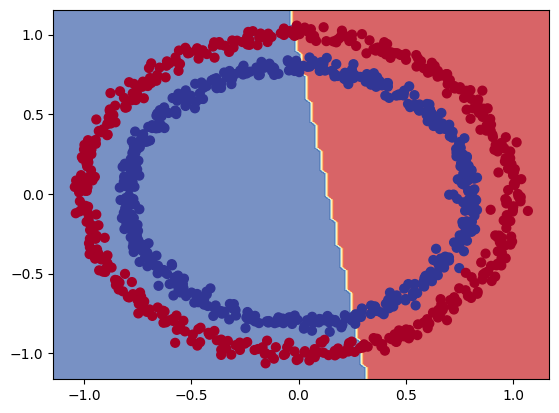

In [98]:
# check the decision boundary for the latest model
plot_decision_boundary(model_4, X, y)

**Let's try to build our first neural network with a non-linear activation functions relu & sigmoid and with 300 epochs.**

In [109]:
# Set the random seed
tf.random.set_seed(24)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'), # another way `tf.keras.activations.relu`
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# 2. compile the model
model_5.compile(
    loss='binary_crossentropy', # another way `tf.keras.losses.BinaryCrossentropy`
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # another way `adam`
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=250, verbose=0)

In [110]:
# Evaluate the model 5
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0111


[0.007795402780175209, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


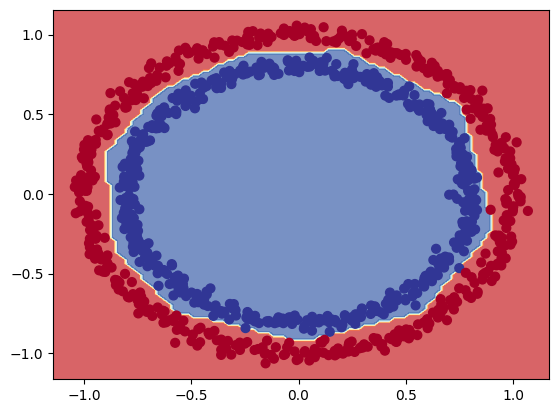

In [111]:
# Lets see how our model predications looks like?
plot_decision_boundary(model_5, X, y)

> This evaluation is not correct since we used the same data for training and testing; i.e., the test set is the same as the training set.

🗝 **Note:** The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks. In other words, you can form infinitely many shapes by combining an infinite number of straight lines.

---

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action...

In [112]:
# Lets create example tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

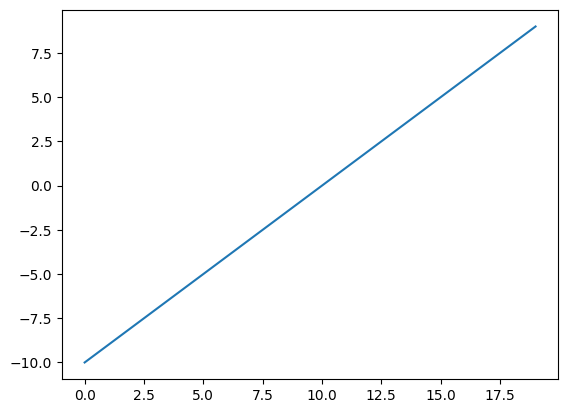

In [113]:
# Visualize the tensor A
plt.plot(A)

In [114]:
# let's calculate sigmoid value
B = tf.sigmoid(A)
B

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397861e-05, 1.2339458e-04, 3.3535008e-04, 9.1105123e-04,
       2.4726230e-03, 6.6928524e-03, 1.7986210e-02, 4.7425866e-02,
       1.1920294e-01, 2.6894140e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

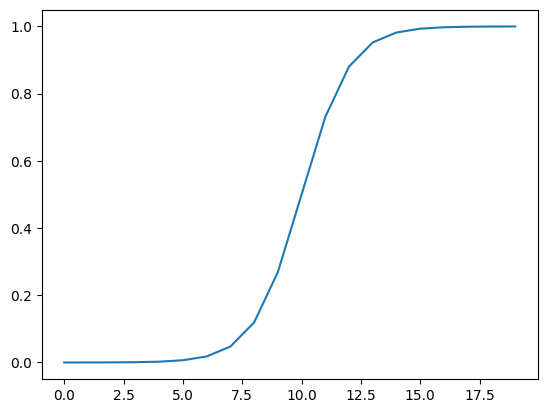

In [116]:
# plt.plot(A)
plt.plot(B)

In [117]:
# lets find another non-linear activation function 
C = tf.nn.relu(A)

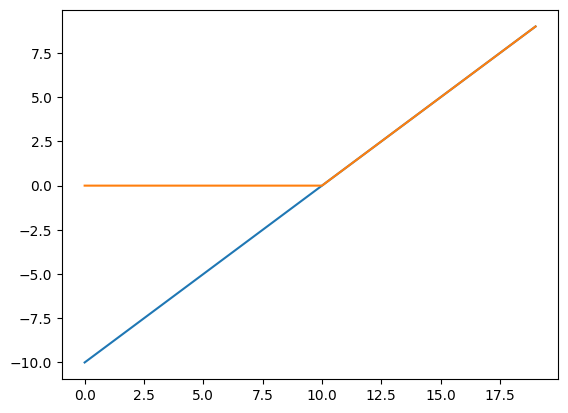

In [119]:
# lets plot the tensor C see the transformation from A to C
plt.plot(A)
plt.plot(C)

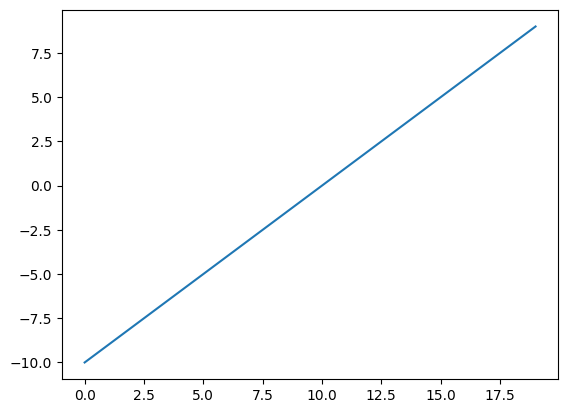

In [120]:
# lets plot the linear activation
D = tf.keras.activations.linear(A)
plt.plot(D);

This linear activation doesn't change data where other non-linear functions change the data as you can see in above plots.
> [For on activation (click here)🔗](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluating and improving our classification model
So far, we were training and testing on the test data. And this is not a good practice.
So lets create a training and test set.

In [121]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [127]:
# Let's recreate a model to fit on the training data and evaluate on test set

# Set random seed
tf.random.set_seed(24)

# 1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='best_model'
                             )

# 2. compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_6.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5226 - loss: 0.6995
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5104 - loss: 0.6907
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 0.6831 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5528 - loss: 0.6762
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5660 - loss: 0.6689
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6041 - loss: 0.6588 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6555 - loss: 0.6468
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.6324 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.6191
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.6051
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8890 - loss: 0.5908 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9088 

In [128]:
# 4. Evaluate the model on the test set
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9931 - loss: 0.1331


[0.1312442421913147, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


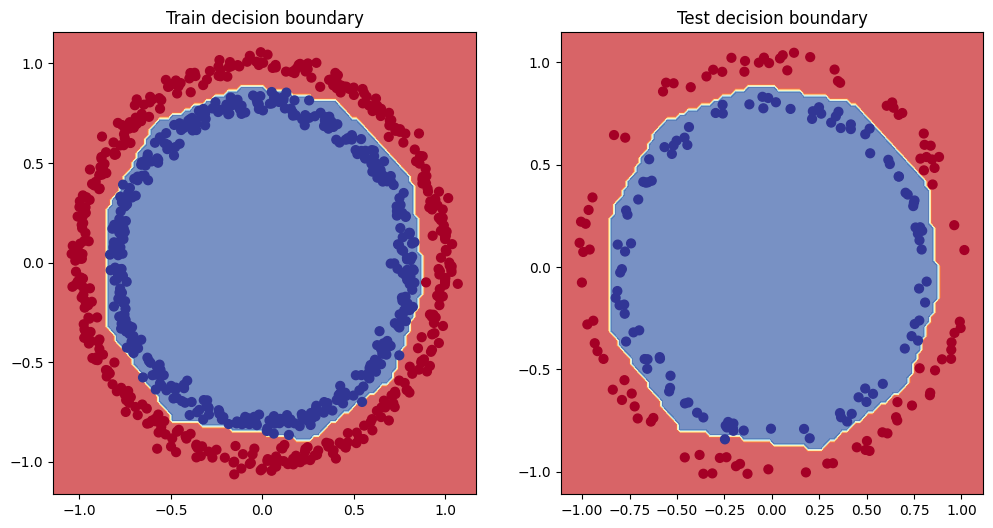

In [129]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train decision boundary")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test decision boundary")
plot_decision_boundary(model_6, X_test, y_test)
plt.show();

In [130]:
# lets see the model_6's summary
model_6.summary()

Model: "best_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (408.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68 (276.00 B)

### Plot the loss (or training) curves

In [131]:
# Convert the history object into a DataFrame
# which `.fit()` returns
pd.DataFrame(history.history)

,accuracy,loss
0,0.52875,0.691945
1,0.54125,0.682631
2,0.56750,0.675941
3,0.58625,0.668804
4,0.59625,0.660687
5,0.64000,0.649845
6,0.70750,0.636730
7,0.78375,0.622146
8,0.86250,0.608863
9,0.90125,0.594630


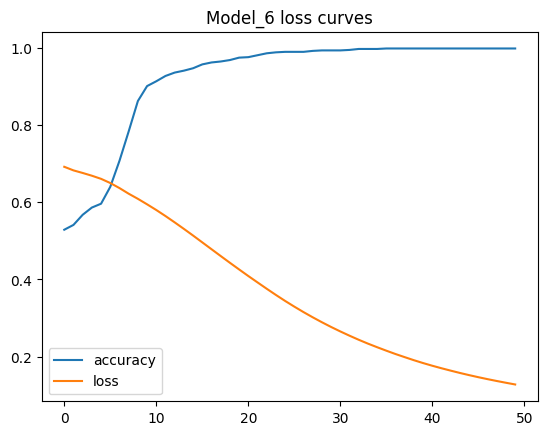

In [132]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves");

🗝 **Notes:** For many problems, the loss function going down means the model is improving (the prediction its making getting ground truth labels).

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of callback as an extra piece of functionality, you can add to while its training.
* Another model (we use the same one as above)
* A modified loss curves plot.

In [139]:
# Set random seed
tf.random.set_seed(24)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

# Create a learning rate callback 
# increase the learning rate exponentially as the epochs progress.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs/20))

# fit the model (passing lr_scheduler callback)
history_7 = model_7.fit(x=X_train,
                      y=y_train,
                      epochs=100,
                      callbacks=[lr_scheduler]
                     )

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4721 - loss: 0.7051 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4721 - loss: 0.7041 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4736 - loss: 0.7030 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4938 - loss: 0.7018 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4994 - loss: 0.7006 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.6992 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4969 - loss: 0.6978 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5034 - loss: 0.6964 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 0.6949 - learning_

<Axes: >

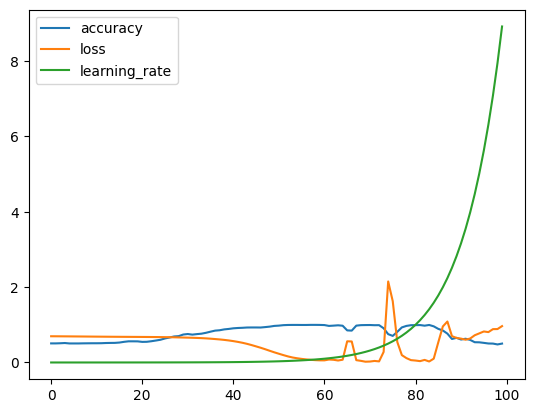

In [143]:
# checkout the history
pd.DataFrame(history_7.history).plot()

>**Insight (Accuracy, Loss, Learning Rate vs Epochs):**
Accuracy improves and loss decreases initially, but both degrade after epoch 70 as learning rate grows too large.\
This highlights the danger of using an exponentially increasing learning rate during full training.


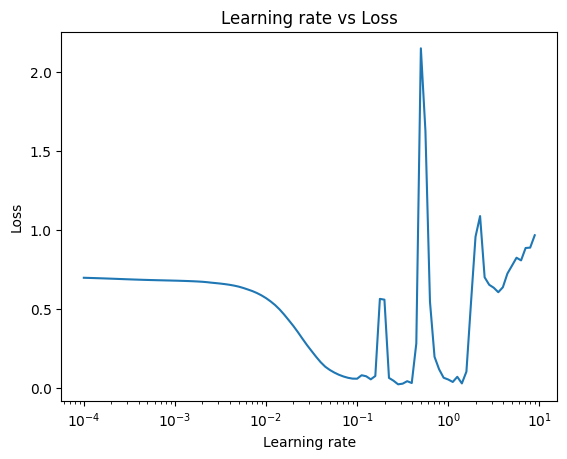

In [144]:
# plot the learning rate versus loss
plt.semilogx(history_7.history['learning_rate'], history_7.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

> **Insight (Learning Rate vs Loss):**
> Loss remains flat at high values for very small learning rates, then decreases sharply and reaches a minimum around `1e-1`.\
> Beyond this, the loss becomes highly unstable, with sharp spikes — indicating divergence due to excessively large learning rates.
> > The optimal learning rate is around `0.1` (`1e-1`), where the loss is lowest and training is most stable.\
> > Example of other optimal learning rate:
> >  ```python
> >   10**0, 10**-1, 10**-2, 10**-3, 1e-4
                


In [147]:
# Lets rebuild the model with optimal learning rate 0.1 with same model as before

# set random seed
tf.random.set_seed(24)

# Create model
model_8 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

# Fit the model
history_8 = model_8.fit(x=X_train,
            y=y_train,
            epochs=20
           )

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5158 - loss: 0.6989
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6158 - loss: 0.6586 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.6138 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.5359
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.4114 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.3080
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.2305 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.1784 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.1392 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.1150 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0994 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [148]:
# Evaluate model 8
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0474  


[0.042232055217027664, 1.0]

In [149]:
# Evaluate model 7 (just for comparison)
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4750 - loss: 0.9314  


[0.9314324259757996, 0.4749999940395355]

> **Achieving 100% accuracy on both train and test at 20 epochs with `lr = 0.1` aligns with our loss curve showing optimal performance at `1e-1`.**


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


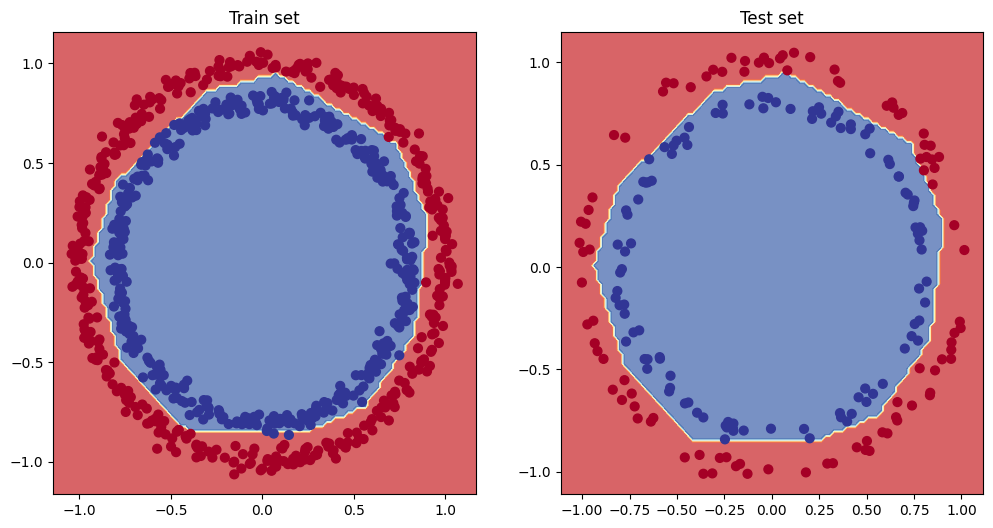

In [150]:
# Plot the decision boundary for train and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train set")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test set")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

## **Some Common `Classification` Evaluation Methods**
Alongside visualizing our models results as much as possible,
there are a handful of other classification evaluation methods and metrics:


| **Metric Name**    | **Metric Formula**         | **TF / sklearn Syntax**   | **When to Use**                           |
|-------------------|----------------------|-----------------------|---------------------------------------------------------------|
| **Accuracy**       | $\frac{TP + TN}{TP + TN + FP + FN}$                        | `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()` | Default metric for classification. Not ideal for imbalanced data. |
| **Precision**      | $\frac{TP}{TP + FP}$                                        | `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()` | Use when **False Positives** are costly (e.g., spam detection). |
| **Recall**         | $\frac{TP}{TP + FN}$                                        | `tf.keras.metrics.Recall()` or <br> `sklearn.metrics.recall_score()` | Use when **False Negatives** are costly (e.g., disease detection). |
| **F1 Score**       | $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | Custom function or <br>`sklearn.metrics.f1_score()`          | Good balance between precision and recall, especially for imbalanced datasets. |
| **AUC-ROC**        | Area under the ROC curve                                    | `tf.keras.metrics.AUC()`                                | Useful for binary classification and probabilistic output evaluation. |
| **Confusion Matrix** | Matrix of counts for TP, TN, FP, FN                         | `tf.math.confusion_matrix()` or `sklearn.metrics.confusion_matrix()` | Visualize detailed classification performance and error types. |
| **Classificaiton report** | Summary of precision, recall, F1-score, and support per class                       | `sklearn.metrics.classification_report()`  | Comprehensive overview of classification metrics per class; great for detailed evaluation. |
		

### Now check the accuracy of the `model 8`

In [153]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print("Model loss on the test set", loss)
print("Model accuracy on the test set", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0474
Model loss on the test set 0.042232055217027664
Model accuracy on the test set 1.0


### Confusion matrix of the `model 9`

In [157]:
from sklearn.metrics import confusion_matrix

y_pred = np.round(tf.squeeze(model_8.predict(X_test)).numpy())
confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[ 95,   0],
       [  0, 105]])

In [158]:
# using tensorflow
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 95,   0],
       [  0, 105]], dtype=int32)>

> **🧠 Insight:**
> The confusion matrix shows **perfect classification**, confirming the model achieved **100% accuracy** with zero misclassifications. If the dataset and evaluation are valid, this is excellent performance.

### We can prettify the confusion matrix

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_percentages(y_true, y_pred, class_names=None, figsize=(8,6), cmap='Blues', normalize=False):
    """
    Plots a confusion matrix with raw counts and percentages in each cell.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        class_names (list, optional): List of class names for axes.
        figsize (tuple, optional): Figure size.
        cmap (str, optional): Colormap.
        normalize (bool, optional): If True, normalize by true class (rows).

    Returns:
        None: Displays the confusion matrix plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    total_samples = np.sum(cm)
    
    if normalize:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix (per true class)'
    else:
        cm_norm = cm / total_samples
        title = 'Confusion Matrix with Counts and Percentages'
    
    plt.figure(figsize=figsize)
    
    # Create annotation labels with counts and percentages
    annot = np.empty_like(cm).astype(str)
    n_rows, n_cols = cm.shape
    for i in range(n_rows):
        for j in range(n_cols):
            if normalize:
                percent = cm_norm[i, j] * 100
            else:
                percent = cm_norm[i, j] * 100
            annot[i, j] = f"{cm[i, j]}\n{percent:.1f}%"
    
    sns.heatmap(cm_norm if normalize else cm, annot=annot, fmt='', cmap=cmap, cbar=True,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


<Figure size 500x500 with 0 Axes>

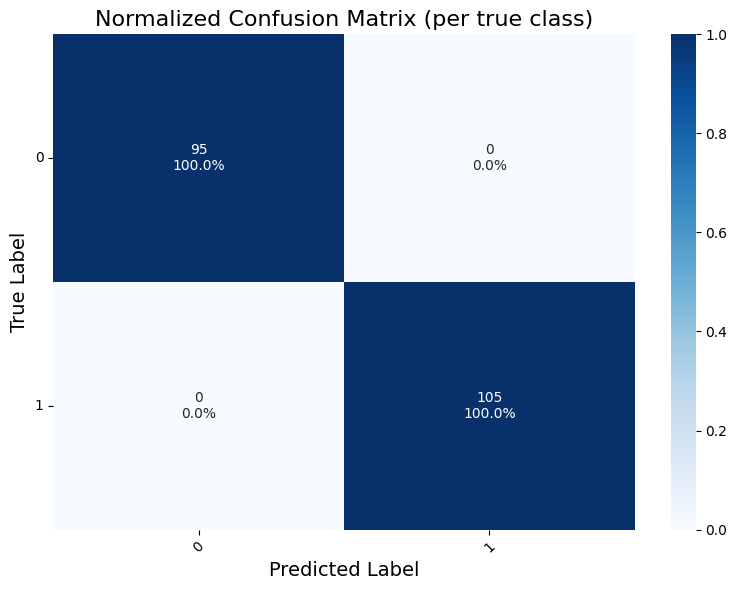

In [168]:
plt.figure(figsize=(5,5))
class_names = [0, 1]
plot_confusion_matrix_with_percentages(y_test, y_pred, class_names=class_names, normalize=True)

## Working with a large example (multiclass classification)
When we have more than two classes as an options, it's known as **multi-class classification**.
* This means if you have three different classes, its a multi-class classification.
* If there are 100 different classes, it's a multi-class classification.

To practice multi-class classificaiton, we are going to build a neural network to classify images of different items of clothing.
>This data is already on `tensorflow.keras.datasets`.
>>Link: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

### Data preparation

In [177]:
# Import the Dataset
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into train and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [178]:
# Check the shape of data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [179]:
# Show some training data
print("Training data\n", train_data[0])
print("Train label:", train_labels[0])

Training data
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [180]:
# Check the shape of some example
train_data[6].shape, train_labels[6].shape

((28, 28), ())

label is: 9


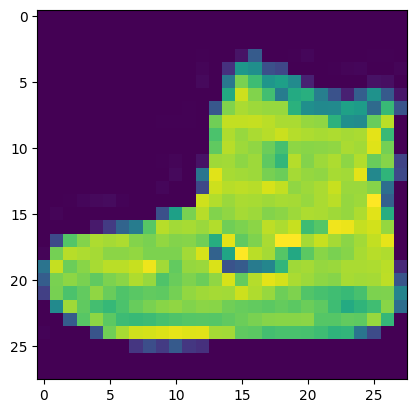

In [182]:
# Plot a single sample
plt.imshow(train_data[0]);

# check sample label
print("label is:", train_labels[0])

In [185]:
# Create a list of fashion classes for human readable instead of these index
fashion_class = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(fashion_class) == len(set(train_labels))

True

Text(0.5, 1.0, 'Bag')

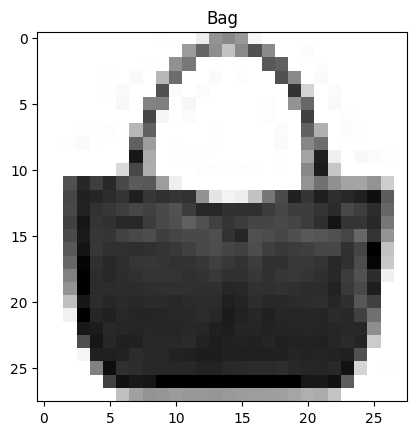

In [187]:
# Plot a single sample
plt.imshow(train_data[100], cmap=plt.cm.binary);

# check sample label
plt.title(fashion_class[train_labels[100]])

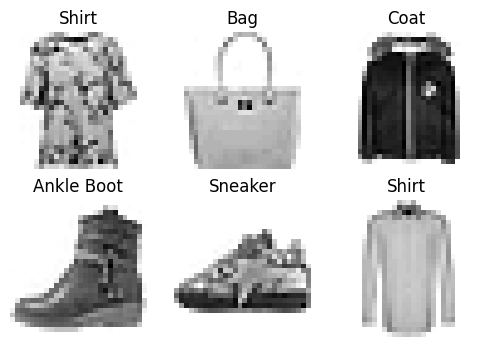

In [200]:
# Lets plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(6, 4))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(fashion_class[train_labels[index]])
    plt.axis(False)

### **Building a Multi-Class Classification Model**
For a multi-class classification model, we can follow a structure similar to binary classification but with a few adjustments:

#### **Model Specifications**
- **Input Shape**: `(28, 28)` (the shape of an image)
- **Output Shape**: `10` (one neuron per class of clothing)
- **Loss Function**:  
  - If labels are **one-hot encoded** → `tf.keras.losses.CategoricalCrossentropy()`
  - If labels are **integer class indices** → `tf.keras.losses.SparseCategoricalCrossentropy()`

---

#### **Difference Between `CategoricalCrossentropy()` and `SparseCategoricalCrossentropy()`**
| Loss Function | Label Format | Preprocessing Needed? | Example Label |
|--------------|-------------|----------------------|---------------|
| `CategoricalCrossentropy` | One-hot encoded | **Yes**, convert integers to one-hot using <br>`tf.keras.utils.to_categorical(data_labels, num_classes=10)` | `[0, 1, 0, 0, ..., 0]` |
| `SparseCategoricalCrossentropy` | Integer class indices | **No**, use directly | `3` |

---

#### **Handling the Input Shape**
If images have a shape of `(28, 28)`, we need to **flatten** them into a **single vector of size `784`** before passing them into a dense network.

#### **Two Ways to Flatten Input Images**
1. **Using `Flatten()` Inside the Model**
   ```python
   tf.keras.layers.Flatten(),  # Converts 2D images into 1D (784,)
   ```
   - Keeps the model flexible, handling reshaping automatically.

2. **Reshaping the Data Before Training**
   ```python
   X_reshaped = tf.reshape(X, shape=(-1, 784))
   ```
   - Ensures input data is correctly formatted before feeding it into the model.

💡 If you use **CNN layers (Conv2D)**, keep the shape `(28, 28, 1)` instead of flattening.



In [222]:
# Set random seed
tf.random.set_seed(24)

# Step 1: Create a model
multi_class_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Define input layer
    tf.keras.layers.Flatten(),  # Converts 2D images into 1D (784,)
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with softmax
], name="multi_class_classifier")

# Step 2: Compile the model
multi_class_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use sparse if labels are integers
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['accuracy']
)

# Step 3: Fit the model
multi_class_history = multi_class_model.fit(
    x=train_data,
    y=train_labels,  
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3242 - loss: 4.2330
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5828 - loss: 1.1039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6944 - loss: 0.7936
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7162 - loss: 0.7200
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7291 - loss: 0.6645


In [223]:
# summary of the model
multi_class_model.summary()

Model: "multi_class_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,352 (298.25 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,902 (198.84 KB)

In [229]:
# Evaluate the model
multi_class_model.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7368 - loss: 0.6669


[0.6683832406997681, 0.7357000112533569]

**Neural networks perform better when input data is **scaled (or normalized)** because it helps in stabilizing training and improving convergence. This means that they prefer numbers in tensors to be within a consistent range, typically between `0` and `1`, as it makes it easier to detect patterns.**

In [230]:
# Check the min and max values of the data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [232]:
# Since the raw pixel values of images are in the range `[0, 255]` (representing intensity levels),
# we can normalize them by dividing each value by `255`, transforming the range to `[0, 1]`. 
train_data_norm = train_data/255
test_data_norm = test_data/255

# verify the min and max values after scaling
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [243]:
# Let's rebuild the model for our scaled data

# Set random seed
tf.random.set_seed(24)

# Create a model 
model_9 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the data into model
history_9 = model_9.fit(
    x=train_data_norm, 
    y=tf.one_hot(train_labels, depth=10).numpy(), # use one hot for categoricalcrossentropy
    epochs=10,
    validation_data= (test_data_norm, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7494 - loss: 0.7474 - val_accuracy: 0.8372 - val_loss: 0.4692
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8495 - loss: 0.4270 - val_accuracy: 0.8481 - val_loss: 0.4325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8607 - loss: 0.3908 - val_accuracy: 0.8553 - val_loss: 0.4142
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8682 - loss: 0.3704 - val_accuracy: 0.8579 - val_loss: 0.4034
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8731 - loss: 0.3554 - val_accuracy: 0.8611 - val_loss: 0.3937
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8777 - loss: 0.3429 - val_accuracy: 0.8643 - val_loss: 0.3860
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8804 - loss: 0.3325 - val_accuracy: 0.8675 - val_loss: 0.3825
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8840 - loss: 0

> Wow, our model improved from 73% to 88% accuracy after normalization.
>
>> **🗝 Note:** Neural networks perform better with data that is numerical and scaled/normalized (values between [0, 1]).

<Axes: title={'center': 'Normalized data'}>

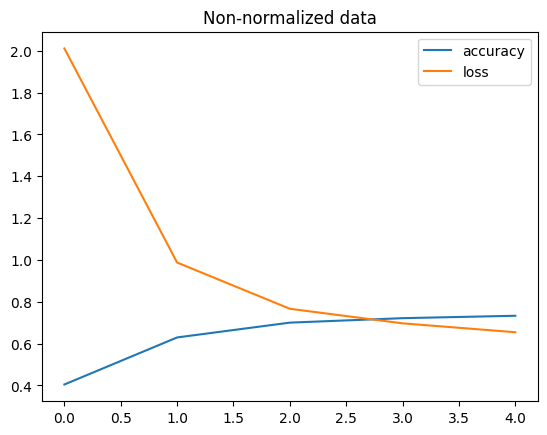

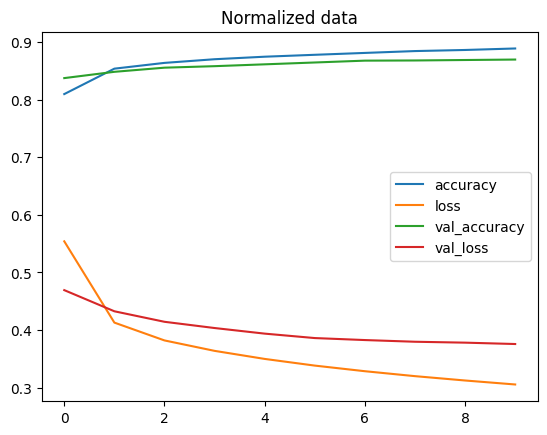

In [246]:
# lets plot data losses and compre with non-normalized model

# Plot non-normalized data loss curve
pd.DataFrame(multi_class_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curve
pd.DataFrame(history_9.history).plot(title="Normalized data")

> You can see this model’s loss started even lower than the previous model, and its accuracy was higher at the start of training.
>
>> 🗝 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. When comparing models, always ensure you are using the same criteria (e.g., same architecture but different data, or same data but different architecture).

## Finding the ideal learning rate

In [249]:
# Set random seed
tf.random.set_seed(24)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10** (epoch/20))

# Fit the model
find_lr_history = model_10.fit(x=train_data_norm,
                               y=train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7488 - loss: 0.7240 - val_accuracy: 0.8339 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8462 - loss: 0.4304 - val_accuracy: 0.8457 - val_loss: 0.4372 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8580 - loss: 0.3933 - val_accuracy: 0.8514 - val_loss: 0.4151 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8655 - loss: 0.3700 - val_accuracy: 0.8564 - val_loss: 0.4041 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8727 - loss: 0.3526 - val_accuracy: 0.8634 - val_loss: 0.3881 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8764 - loss: 0.3396 - val_accuracy: 0.8627 - val_loss: 0.3878 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - l

Text(0, 0.5, 'Loss')

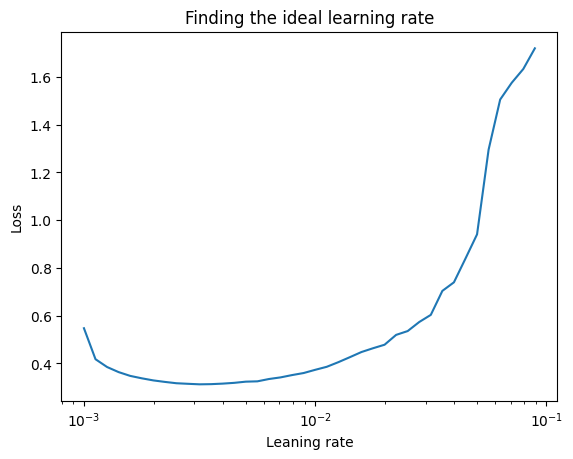

In [250]:
# Plot the learning rate decay curve
plt.semilogx(find_lr_history.history['learning_rate'], find_lr_history.history['loss'])
plt.title("Finding the ideal learning rate")
plt.xlabel("Leaning rate")
plt.ylabel("Loss")

> Since lowest point in the loss is about at 0.001 (1e-3)
> > This implies optimal **learning rate = 0.001**

In [256]:
# Lets rebuild the model with ideal learning rate

# Set random seed
tf.random.set_seed(24)

# Create model
model_11 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
history_11 = model_11.fit(x=train_data_norm,
                               y=train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels),
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7546 - loss: 0.7258 - val_accuracy: 0.8389 - val_loss: 0.4595
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8512 - loss: 0.4254 - val_accuracy: 0.8519 - val_loss: 0.4264
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8640 - loss: 0.3876 - val_accuracy: 0.8574 - val_loss: 0.4075
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8720 - loss: 0.3637 - val_accuracy: 0.8613 - val_loss: 0.3960
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8772 - loss: 0.3467 - val_accuracy: 0.8625 - val_loss: 0.3892
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8814 - loss: 0.3349 - val_accuracy: 0.8651 - val_loss: 0.3808
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8851 - loss: 0.3242 - val_accuracy: 0.8682 - val_loss: 0.3769
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8864 - loss: 0.3157 - 

## Evaluating this multi-class classification model

To evaluate this classification model, you can:  
* Use classification metrics such as the confusion matrix, precision, recall, and F1-score  
* Visualize some predictions to assess model behavior  
* Improve results by training longer or modifying the architecture  
* Save and export the model for deployment  

#### Make the prediction on `test_data_norm`

In [276]:
# Make predictions
y_preds_11 = model_11.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [277]:
# Lets view our predictions
y_preds_11

array([[1.8587134e-05, 1.9930936e-10, 3.0014480e-06, ..., 6.5183230e-02,
        2.9315703e-04, 9.2937011e-01],
       [4.7243753e-07, 1.1801449e-14, 9.9901891e-01, ..., 8.5932709e-25,
        2.8440924e-13, 3.0867273e-24],
       [2.7171088e-08, 9.9999976e-01, 3.4372253e-08, ..., 8.4247535e-18,
        1.6679974e-10, 3.8237256e-21],
       ...,
       [4.0444551e-04, 2.0531920e-12, 1.8399171e-04, ..., 2.3212066e-13,
        9.9922538e-01, 3.5901786e-14],
       [5.9515536e-08, 9.9994969e-01, 2.6000300e-09, ..., 1.6299176e-13,
        1.4067906e-09, 6.0292491e-15],
       [9.9048841e-05, 7.1476558e-09, 1.2487848e-05, ..., 8.2682593e-05,
        2.9118861e-05, 1.7045683e-07]], dtype=float32)

In [278]:
# Since prediciton is one- hot encoded 
# lets find the index of each `1`
y_preds_11_new = tf.argmax(y_preds_11, axis=1)

# Convert this into test label format
y_preds_11_new = tf.reshape(y_preds_11_new, shape=test_labels.shape).numpy()

<Figure size 500x500 with 0 Axes>

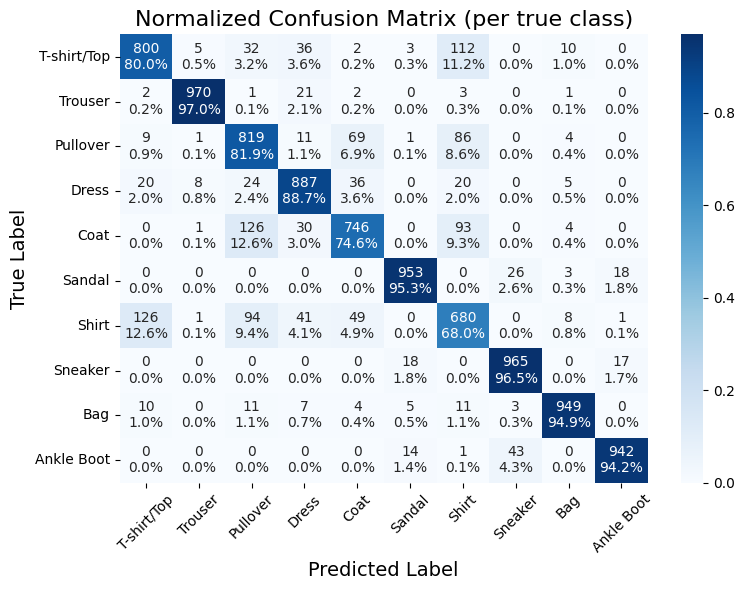

In [280]:
plt.figure(figsize=(5,5))
class_names = fashion_class
plot_confusion_matrix_with_percentages(test_labels, y_preds_11_new, class_names=class_names, normalize=True)

---

**Overall Performance:**

*   The model generally performs well, with high diagonal values (indicating correct classifications) for most classes.

**Strong Classifications (High Precision & Recall):**

*   **Trouser:**  Excellent performance; almost perfectly classified.
*   **Sandal:** Very accurate classification.
*   **Sneaker:** Extremely high classification accuracy.
*   **Bag:** Very high classification accuracy.
*   **Ankle Boot:**  Very accurate classification.
*   **Dress:** Quite good classification.

**Confusion Areas (Where the Model Struggles):**

*   **T-shirt/Top:** There's notable confusion with Shirt and Pullover. A significant portion of T-shirts/Tops are misclassified as Shirts. Pullovers are also misclassified as T-shirts.
*   **Pullover:** Significant proportion are confused with T-shirts.
*   **Coat:** Substantial confusion with Pullover, and also a significant portion misclassified as Dress.
*   **Shirt:** Many Shirts are misclassified as T-shirts/Tops, Pullovers.

---

**🗝 Note:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of our models.

How aboutwe create a fun little function for:
* Plot a random image
* Make a prediction on said image.
* Label the plot with the truth label and the predicted label

In [291]:
import random

def plot_random_images(model, images, true_labels, classes):
    """
    Picks a random image, plot it and label it with a prediction and truth label.
    """

    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    predictions = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[predictions.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of titles depending if prediction is wrong or not
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information prediction vs truth
    plt.xlabel(xlabel=f"Pred: {pred_label} with {100*tf.reduce_max(predictions):2.0f}% probability \n True: {true_label}",
              color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


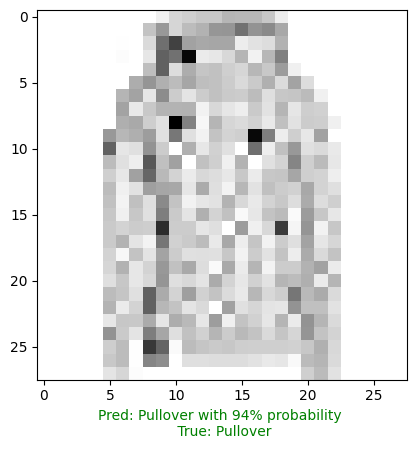

In [297]:
# Check out a random image as well as its prediction
plot_random_images(model=model_11,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=fashion_class
                 )

## What patterns is our model learning?

In [298]:
# Find the layers of our most recent model
model_11.layers

[<Flatten name=flatten_10, built=True>,
 <Dense name=dense_89, built=True>,
 <Dense name=dense_90, built=True>]

In [299]:
# Extract a particular layer
model_11.layers[1]

<Dense name=dense_89, built=True>

In [300]:
# Get the patterns of a layer in our network
weights, biases = model_11.layers[1].get_weights()

# Shapes
weights.shape, weights

((784, 32),
 array([[-0.06571791,  0.8755795 ,  0.5035593 , ...,  0.7655733 ,
          0.13821156, -0.84366757],
        [ 0.6377883 , -0.2181219 ,  0.53403324, ..., -0.18197455,
         -0.23484011, -0.5592588 ],
        [ 0.5504476 , -0.13866067,  0.13417275, ..., -0.5517991 ,
          0.4809198 , -0.76334023],
        ...,
        [ 0.43231198, -0.01536823, -0.5406241 , ..., -0.02958268,
          0.03008885, -0.25923133],
        [ 0.6255266 ,  0.03234646, -0.89156824, ...,  0.29001385,
         -0.25272575, -0.52110606],
        [-0.10486422,  0.53424853, -0.18150707, ...,  0.13994037,
         -0.11385841, -0.63632447]], dtype=float32))

In [301]:
# model's summary
model_11.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,352 (298.25 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,902 (198.84 KB)

In [302]:
# Now lets check the bias vector
# Bias and its shape
biases.shape, biases

((32,),
 array([ 1.5448163 ,  0.29759324,  0.99910957,  0.63233787,  0.666946  ,
         0.35536575,  0.44068485,  0.02042712,  0.6711651 , -0.01945663,
         0.67927146, -0.96002567,  0.01741895, -0.3798985 ,  0.85696656,
         0.36085358, -0.26125583, -0.15319134,  0.42299122,  0.42533976,
         0.28639457,  0.32262418, -0.02516183, -0.7776511 ,  0.4591579 ,
         0.5252638 , -0.01148811,  0.8235583 ,  0.46366978,  0.09950155,
         0.20057385,  0.0435602 ], dtype=float32))

Every neuron has a bias vector. Each of these is paired with a weigth matrix.

The bias vector get intialized as zeros (at least in the case of a TensorFlow Dense layer)

The bias vector dictats how much the patterns within the corresponding weights matrix should influence the next layer.

In [303]:
model_11.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,352 (298.25 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,902 (198.84 KB)

In [305]:
# Lets check  out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs each layer
plot_model(model_11, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
